# **Pronóstico (Bosques aleatorios)**

Nombre: Hernández Luis Sergio Ángel

No. Cuenta: 315289538

Email: angelhdz104@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Cemex
DataCemex = yf.Ticker('CX')

In [4]:
CemexHist = DataCemex.history(start = '2012-1-1', end = '2022-11-25', interval='1d')
CemexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275,22231529,0.0,0.0
2012-01-04,4.366275,4.459838,4.280510,4.428651,30384865,0.0,0.0
2012-01-05,4.389666,4.405260,4.303900,4.342885,24282231,0.0,0.0
2012-01-06,4.374072,4.413057,4.179149,4.233728,29589232,0.0,0.0
2012-01-09,4.241525,4.280510,4.132368,4.163556,16019571,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000,6641900,0.0,0.0
2022-11-18,4.550000,4.550000,4.470000,4.500000,2148300,0.0,0.0
2022-11-21,4.430000,4.460000,4.370000,4.400000,1655400,0.0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
CemexHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2012-01-03 to 2022-11-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2743 non-null   float64
 1   High          2743 non-null   float64
 2   Low           2743 non-null   float64
 3   Close         2743 non-null   float64
 4   Volume        2743 non-null   int64  
 5   Dividends     2743 non-null   float64
 6   Stock Splits  2743 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 171.4 KB


In [6]:
CemexHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2743.000000,2743.000000,2743.000000,2743.000000,2.743000e+03,2743.000000,2743.000000
mean,6.817052,6.924130,6.709045,6.813789,1.141537e+07,0.000018,0.002275
std,2.355263,2.368977,2.340676,2.353518,7.512961e+06,0.000955,0.048596
min,1.740000,1.790000,1.550000,1.630000,1.166500e+06,0.000000,0.000000
25%,4.794678,4.881734,4.678145,4.770437,6.509250e+06,0.000000,0.000000
50%,6.846720,6.960000,6.730000,6.846721,9.771300e+06,0.000000,0.000000
75%,8.556503,8.690425,8.438598,8.564661,1.431521e+07,0.000000,0.000000
max,11.945387,12.118434,11.787517,11.919076,1.210741e+08,0.050000,1.040000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

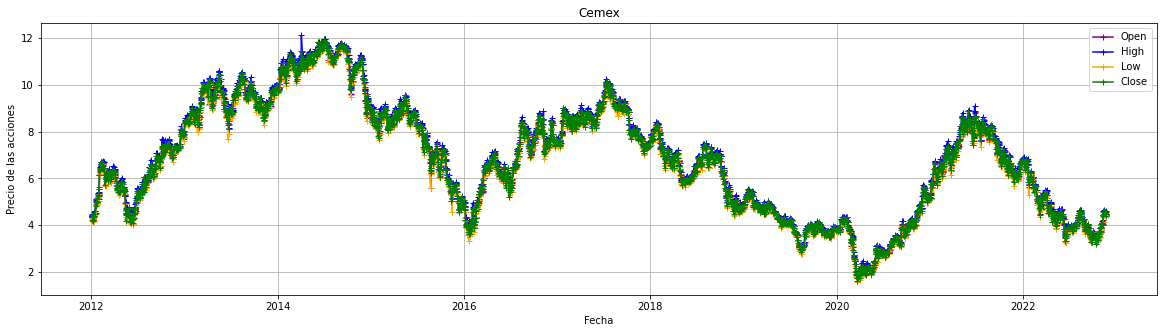

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(CemexHist['Open'], color='purple', marker='+', label='Open')
plt.plot(CemexHist['High'], color='blue', marker='+', label='High')
plt.plot(CemexHist['Low'], color='orange', marker='+', label='Low')
plt.plot(CemexHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Cemex')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
MDatos = CemexHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275
2012-01-04,4.366275,4.459838,4.280510,4.428651
2012-01-05,4.389666,4.405260,4.303900,4.342885
2012-01-06,4.374072,4.413057,4.179149,4.233728
2012-01-09,4.241525,4.280510,4.132368,4.163556
...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000
2022-11-18,4.550000,4.550000,4.470000,4.500000
2022-11-21,4.430000,4.460000,4.370000,4.400000


In [9]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275
2012-01-04,4.366275,4.459838,4.280510,4.428651
2012-01-05,4.389666,4.405260,4.303900,4.342885
2012-01-06,4.374072,4.413057,4.179149,4.233728
2012-01-09,4.241525,4.280510,4.132368,4.163556
...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000
2022-11-18,4.550000,4.550000,4.470000,4.500000
2022-11-21,4.430000,4.460000,4.370000,4.400000


### Aplicación del algoritmo

In [10]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [11]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,4.342885,4.420853,4.335088
1,4.366275,4.459838,4.280510
2,4.389666,4.405260,4.303900
3,4.374072,4.413057,4.179149
4,4.241525,4.280510,4.132368
...,...,...,...
2738,4.460000,4.530000,4.450000
2739,4.550000,4.550000,4.470000
2740,4.430000,4.460000,4.370000
2741,4.450000,4.490000,4.410000


In [12]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,4.366275
1,4.428651
2,4.342885
3,4.233728
4,4.163556
...,...
2738,4.500000
2739,4.500000
2740,4.400000
2741,4.470000


Se hace la división de los datos

In [13]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [14]:
pd.DataFrame(X_test)

,0,1,2
0,11.603339,11.638421,11.533175
1,6.659274,6.659274,6.205457
2,6.905914,6.955242,6.748065
3,8.611542,8.798044,8.570998
4,3.600000,3.730000,3.600000
...,...,...,...
544,7.900000,8.240000,7.740000
545,6.500000,6.510000,6.290000
546,9.844080,10.022474,9.844080
547,5.181521,5.343698,5.092325


Se entrena el modelo

In [15]:
PronosticoBA = RandomForestRegressor(random_state=0)
PronosticoBA.fit(X_train, Y_train)

#PronosticoBA = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0)
#PronosticoBA.fit(X_train, Y_train)

C:\Users\Angel\AppData\Local\Temp\ipykernel_15796\2361797578.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA.fit(X_train, Y_train)


RandomForestRegressor(random_state=0)

In [16]:
#Se genera el pronóstico
Y_Pronostico = PronosticoBA.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,11.574308
1,6.344180
2,6.868920
3,8.715955
4,3.704661
...,...
544,7.984181
545,6.385048
546,9.901286
547,5.251440


In [17]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
11.574308,11.594568
6.344180,6.363307
6.868920,6.826989
8.715955,8.708847
3.704661,3.710000
...,...
7.984181,8.070000
6.385048,6.370000
9.901286,9.957603
5.251440,5.278827


In [18]:
r2_score(Y_test, Y_Pronostico)

0.9988810733203944

In [19]:
print('Criterio: \n', PronosticoBA.criterion)
print('Importancia variables: \n', PronosticoBA.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [0.00317205 0.46818728 0.52864067]
MAE: 0.0604
MSE: 0.0063
RMSE: 0.0792
Score: 0.9989


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9984, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 1.75 y 1.32 unidades del valor real, esto es, MSE y RMSE, respectivamente.

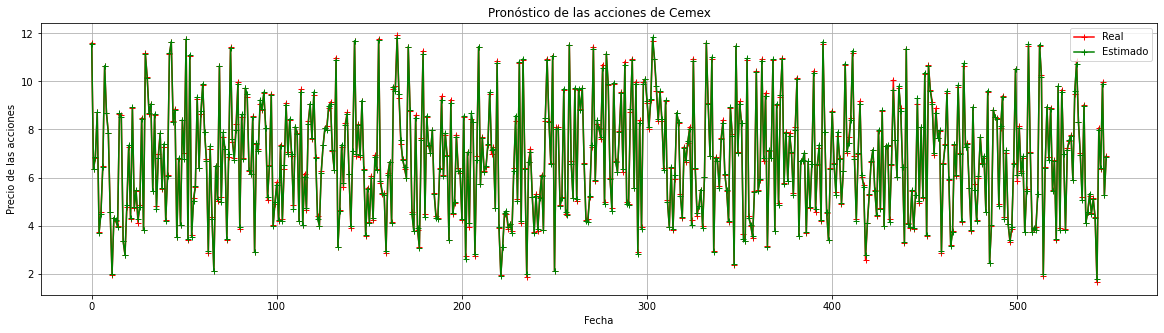

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Cemex')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
2,Low,0.528641
1,High,0.468187
0,Open,0.003172


#### **Conformación del árbol**

In [22]:
Estimador = PronosticoBA.estimators_[99]
Estimador

DecisionTreeRegressor(max_features='auto', random_state=1396067212)

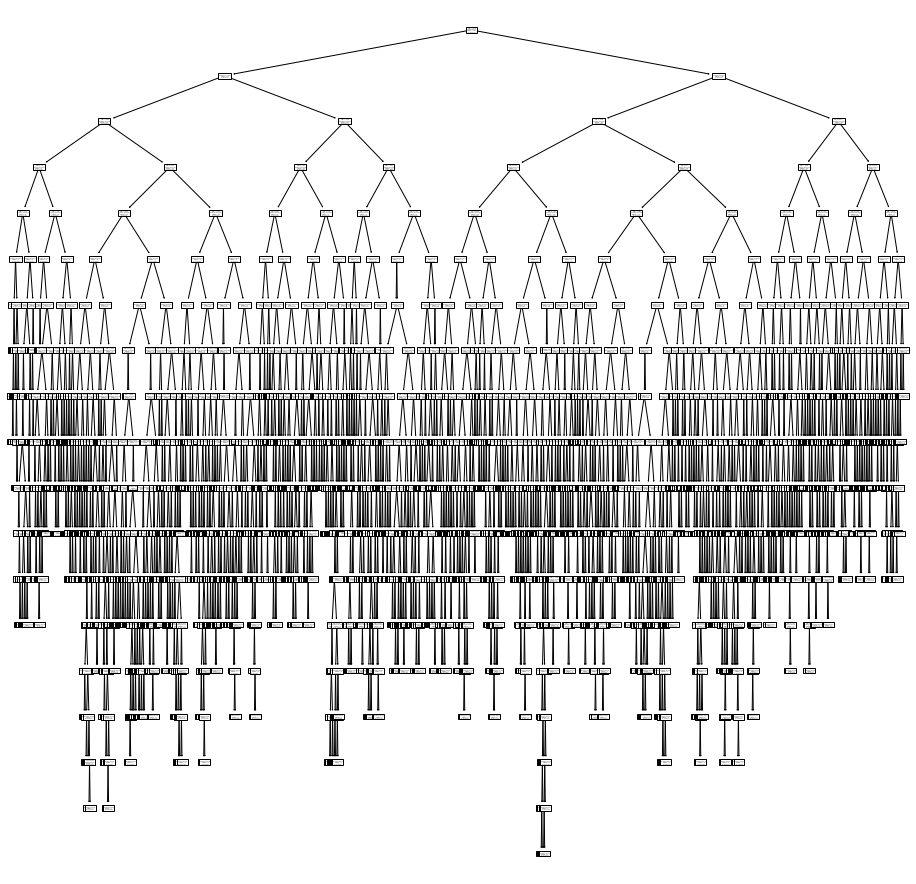

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Open', 'High', 'Low'])
plt.show()

In [24]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- High <= 6.82
|   |--- High <= 5.03
|   |   |--- High <= 3.51
|   |   |   |--- Low <= 2.47
|   |   |   |   |--- High <= 2.07
|   |   |   |   |   |--- Low <= 1.81
|   |   |   |   |   |   |--- Low <= 1.75
|   |   |   |   |   |   |   |--- Low <= 1.70
|   |   |   |   |   |   |   |   |--- Open <= 1.81
|   |   |   |   |   |   |   |   |   |--- value: [1.75]
|   |   |   |   |   |   |   |   |--- Open >  1.81
|   |   |   |   |   |   |   |   |   |--- value: [1.74]
|   |   |   |   |   |   |   |--- Low >  1.70
|   |   |   |   |   |   |   |   |--- value: [1.73]
|   |   |   |   |   |   |--- Low >  1.75
|   |   |   |   |   |   |   |--- value: [1.83]
|   |   |   |   |   |--- Low >  1.81
|   |   |   |   |   |   |--- High <= 2.03
|   |   |   |   |   |   |   |--- Low <= 1.84
|   |   |   |   |   |   |   |   |--- value: [1.88]
|   |   |   |   |   |   |   |--- Low >  1.84
|   |   |   |   |   |   |   |   |--- Open <= 1.93
|   |   |   |   |   |   |   |   |   |--- value: [1.95]
|   |   |   |   |   |   |   |

#### **Nuevos pronósticos**

In [25]:
PrecioAccion = pd.DataFrame({'Open': [4.54],
                             'High': [4.58], 
                             'Low': [4.52]})
PronosticoBA.predict(PrecioAccion)

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([4.55944134])